# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy import stats

In [2]:
pd.set_option('mode.chained_assignment',None)

# Problem Description

About Dataset:

Contains orders from an E-commerce site (UK Retailer), with various products and orders. Try starting with EDA and applying different functions to know more about the data. The dataset is tricky as it contains all the problems that an actual site may have.

Some hints to know what problems the dataset has:

* Contains duplicates!! Check for it and remove them
* Contains missing values
* Has negative unit price, try to guess what could be the reason
* Has negative quantity, try to guess what could be the reason

Apply a prescriptive analysis approach to data and find ways to increase sales. This is an interesting task that builds up skills like business Intelligence.

### Importing DataFrame

In [3]:
data = pd.read_csv('data.csv', encoding='unicode_escape')

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Check for Datatypes

In [5]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [7]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Summary:

* The dtype of InvoiceDate should be changed from object to DateTime
* The CustomerID is unique to a customer, so we can't consider them as float64, so changed them as object.

In [8]:
data = data.astype({'CustomerID':object})

In [9]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## Check for missing values

In [10]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# Step 1: Calculate the most frequent description for each stockcode
grouped_description = data.groupby('StockCode')['Description'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

# Step 2: Create a mapping dictionary with NaN values handled as well
mapping_dict = dict(zip(grouped_description['StockCode'], grouped_description['Description']))

# Step 3: Fill missing descriptions based on the mapping dictionary
data['Description'] = data['StockCode'].map(mapping_dict).combine_first(data['Description'])

In [12]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
data[data['CustomerID']==17850.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
86898,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850.0,United Kingdom
86899,C543611,21874,GIN AND TONIC MUG,-1,2011-02-10 14:38:00,1.06,17850.0,United Kingdom
86900,C543611,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,-2,2011-02-10 14:38:00,2.75,17850.0,United Kingdom
86901,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850.0,United Kingdom


In [15]:
135080/len(data)


0.249266943342886

In [16]:
1454/len(data)

0.002683107311375157

In [17]:
112/len(data)

0.00020667676676342338

In [18]:
data.dropna(subset=['Description'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [19]:
data.fillna('Unknown')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [20]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Summary:

* The percentage of missing value in CustomerID is more than 24.9%.
* Since CustomerID cannot be filled using imputation methods we are going to drop the columns.

* The percentage of missing values in Description is less than 2% we have to impute the values.
* The values are filled based on the relation between stockcode and description.
* After imputing there are few values which were not filled because there are no decription for the specific stockcode. Since there are only 0.2% we can drop those columns.

## Checking for Duplicate values

In [21]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [22]:
data.drop_duplicates(keep='last', inplace=True)

In [23]:
len(data)

536639

In [24]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [25]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Summary:

* Removed duplicate values from the dataframe.
* The reason why I used keep values as last is because maybe there maybe a change in the order so we can take the last duplicate value as the actual value.

### Checking reason for negative quantity and price

In [26]:
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [27]:
data = data[data['UnitPrice']>=0]

In [28]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [29]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Checking if the negative quantity is caused due to order cancellation or return

In [30]:
one_order = data[data['InvoiceNo']=='C581490']

In [31]:
one_order

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom


Individual order, so is not considered as return of items

In [32]:
data['Quantity'] = data['Quantity'].apply(abs)

Summary:
* The special stockcode means
    - B - Bad Debt
* Bad Debt is the only negative unit price in the dataset and can be considered as a debt.
This should be removed from the dataset as it may cause distraction
* The reason for negative quantities can be explained by only
    - Error during data entry
    - While checking if the negative sign maybe the cause of return, it turns out its not. 
* So converted the sign in quantity column 




## Feature Extraction

In [33]:
data['Time'] = data['InvoiceDate'].dt.time
data['Month'] = data['InvoiceDate'].dt.month_name()
data['Day'] = data['InvoiceDate'].dt.day_name()
data['Year']= data['InvoiceDate'].dt.year
data = data.drop('InvoiceDate', axis=1)

In [34]:
data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Month,Day,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,08:26:00,December,Wednesday,2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,08:26:00,December,Wednesday,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,12:50:00,December,Friday,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12:50:00,December,Friday,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,12:50:00,December,Friday,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,12:50:00,December,Friday,2011


In [35]:
data['Amount'] = data['Quantity']*data['UnitPrice']

In [36]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
CustomerID      object
Country         object
Time            object
Month           object
Day             object
Year             int64
Amount         float64
dtype: object

## Data Visualizations and Getting Insights

<Axes: xlabel='Amount'>

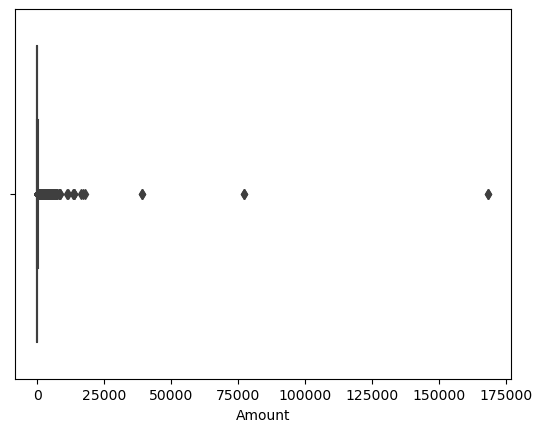

In [37]:
sns.boxplot(x=data['Amount'])

Most of the order total is in between 0 to 25000. But there are few orders more than 30000.
Let's check what these orders are

In [38]:
data[data['Amount']>=30000]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Amount
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,12346.0,United Kingdom,10:01:00,January,Tuesday,2011,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,12346.0,United Kingdom,10:17:00,January,Tuesday,2011,77183.6
222680,556444,22502,PICNIC BASKET WICKER SMALL,60,649.50,15098.0,United Kingdom,15:28:00,June,Friday,2011,38970.0
222681,C556445,M,Manual,1,38970.00,15098.0,United Kingdom,15:31:00,June,Friday,2011,38970.0
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,United Kingdom,09:15:00,December,Friday,2011,168469.6
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,United Kingdom,09:27:00,December,Friday,2011,168469.6


These orders are bulk order of the same item and by 3 customers. So need not consider it as outliers.


In [39]:
products = data.groupby('StockCode').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'CustomerID': 'nunique',
    'Country': 'first'
})

In [40]:
products = products.sort_values(by='Quantity', ascending=False)
products

,Quantity,UnitPrice,CustomerID,Country
StockCode,,,,
23843,161990,2.080000,1,United Kingdom
23166,152527,1.456846,138,United Kingdom
22197,57369,1.035634,407,United Kingdom
84077,56151,0.319963,307,United Kingdom
85099B,49490,2.470965,636,United Kingdom
...,...,...,...,...
21282,1,0.000000,0,United Kingdom
21134,1,0.000000,0,United Kingdom
20957,1,1.450000,1,Germany


By above dataset, we can see that a few customer have ordered the same product in huge quantities. So checking with those customers and providing exclusive offers for them might be helpful.

<Figure size 1000x600 with 0 Axes>

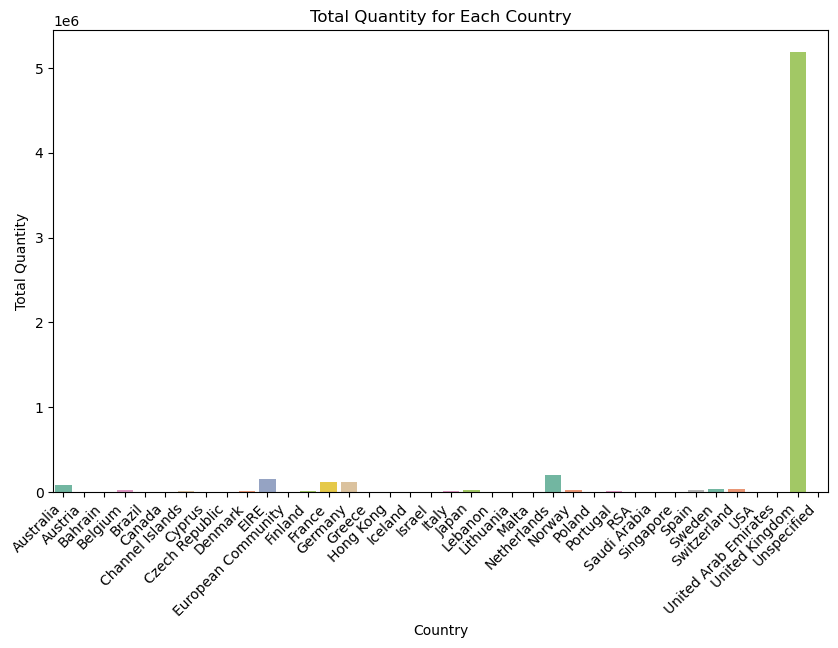

In [41]:
plt.figure(figsize=(10, 6))
country_sales = data.groupby('Country')['Quantity'].sum().reset_index()

# Plot the total quantity for each country
plt.figure(figsize=(10, 6))
sns.barplot(data=country_sales, x='Country', y='Quantity', palette='Set2')
plt.title('Total Quantity for Each Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha="right")
plt.show()

In [42]:
country_sales

,Country,Quantity
0,Australia,84755
1,Austria,4935
2,Bahrain,368
3,Belgium,23322
4,Brazil,356
5,Canada,2763
6,Channel Islands,9497
7,Cyprus,6384
8,Czech Republic,750
9,Denmark,8282


From above graph we can see that since the company is located in UK, most orders are from UK. And there are few orders from other countries. We will look into the countries where the company can take few initiatives to expand their business.

In [43]:
country_sales.sort_values(by = 'Quantity', ascending= False, inplace = True)

Let's see the top 10 countries where the sales are high

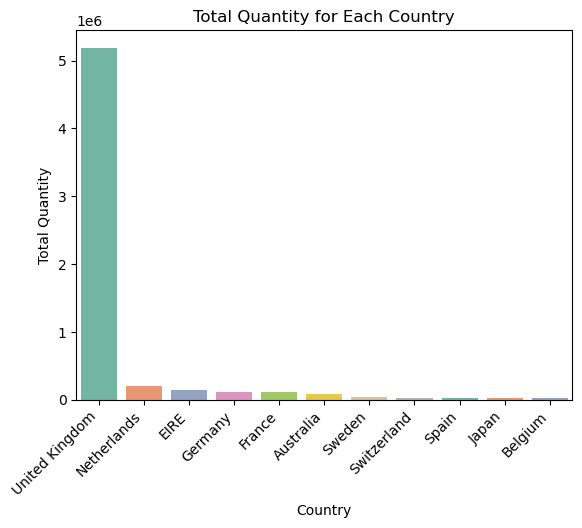

In [44]:
sns.barplot(data=country_sales[:11], x='Country', y='Quantity', palette='Set2')
plt.title('Total Quantity for Each Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha="right")
plt.show()

* Netherlands, EIRE, Germany, France, Australia are having sales more than the remaining countries. So concentrating on such countries for more future sales is recommended.
* The other 6 countries may have higher sales in the future.

In [45]:
bulk_order_customers = data.groupby('CustomerID')['Quantity'].sum().reset_index()
bulk_order_customers.sort_values(by = 'Quantity', ascending= False, inplace = True)
bulk_order_customers

,CustomerID,Quantity
1703,14646.0,198263
3033,16446.0,161992
0,12346.0,148430
1895,14911.0,83825
55,12415.0,78098
...,...,...
3435,16995.0,1
125,12503.0,1
467,12943.0,1
2745,16061.0,1


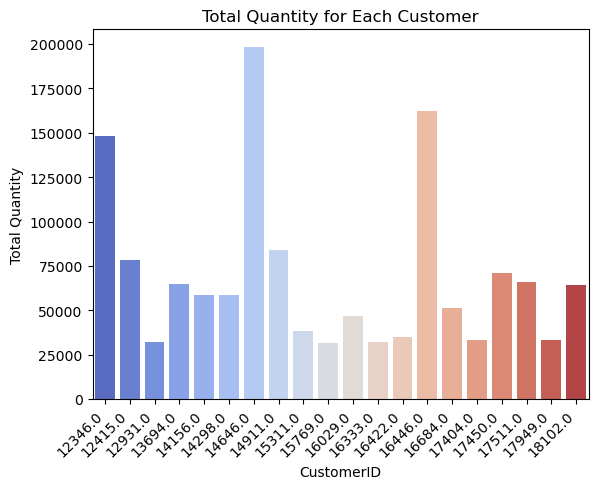

In [46]:
sns.barplot(data=bulk_order_customers[:20], x='CustomerID', y='Quantity', palette= 'coolwarm')
plt.title('Total Quantity for Each Customer')
plt.xlabel('CustomerID')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha="right")
plt.show()

* The above customers are the high quantities ordering customers
* Few customers have ordered more than 1 lakh products

In [47]:
sales_per_year = data.groupby(['Year','Month'])['Amount'].sum().reset_index()
sales_per_year['YearMonth'] = pd.to_datetime(sales_per_year['Year'].astype(str) + '-' + sales_per_year['Month'], format='%Y-%B')
sales_per_year = sales_per_year.sort_values('YearMonth')
sales_per_year.drop('YearMonth', axis=1, inplace=True)
sales_per_year

,Year,Month,Amount
0,2010,December,896181.850
5,2011,January,821174.660
4,2011,February,548064.710
8,2011,March,750416.540
1,2011,April,581569.141
9,2011,May,816484.270
7,2011,June,831116.790
6,2011,July,755995.251
2,2011,August,812172.180
12,2011,September,1095273.702


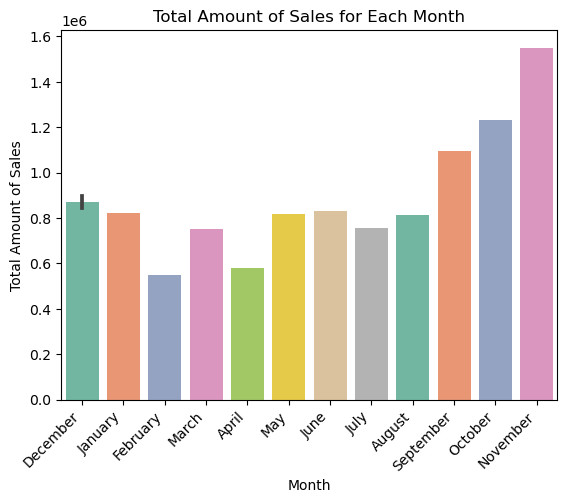

In [48]:
sns.barplot(data = sales_per_year, x = 'Month', y = 'Amount', palette = 'Set2')
plt.title('Total Amount of Sales for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Amount of Sales')
plt.xticks(rotation=45, ha="right")
plt.show()

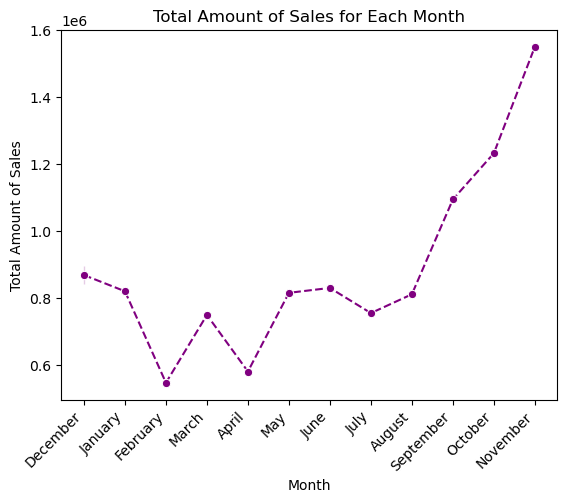

In [49]:
sns.lineplot(data = sales_per_year, x = 'Month', y = 'Amount', marker = 'o', linestyle = '--', color = 'purple')
plt.xlabel('Month')
plt.ylabel('Total Amount of Sales')
plt.title('Total Amount of Sales for Each Month')
plt.xticks(rotation=45, ha="right")
plt.show()

In [50]:
sales_per_year.sort_values(by = 'Amount', ascending = False)

,Year,Month,Amount
10,2011,November,1551050.760
11,2011,October,1233159.230
12,2011,September,1095273.702
0,2010,December,896181.850
3,2011,December,842879.600
7,2011,June,831116.790
5,2011,January,821174.660
9,2011,May,816484.270
2,2011,August,812172.180
6,2011,July,755995.251


* The sales are high during September, October, November, December.
* And there is also increase in sales at the year end and at start.
* The sales in the mid year are normal.

In [51]:
sales_by_day = data.groupby('Day')['Amount'].mean().reset_index()
sales_by_day.sort_values(by = 'Amount', ascending= False, inplace = True)
sales_by_day

,Day,Amount
0,Friday,25.929137
4,Tuesday,23.605808
3,Thursday,22.219799
5,Wednesday,20.952295
1,Monday,20.825635
2,Sunday,12.975197


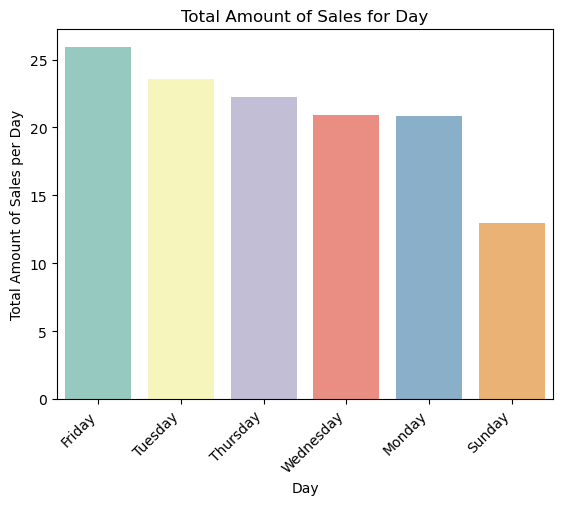

In [52]:
sns.barplot(data = sales_by_day, x = 'Day', y = 'Amount', palette = 'Set3')
plt.title('Total Amount of Sales for Day')
plt.xlabel('Day')
plt.ylabel('Total Amount of Sales per Day')
plt.xticks(rotation=45, ha="right")
plt.show()

* We can see from above graph that high avg sales amount is generated on weekdays and there is less sales on Sunday.
* We can also observe that there is completedly no invoice generated on Saturdays.

In [53]:
orders_per_day = data.groupby('Day')['Quantity'].sum().reset_index()
orders_per_day.sort_values(by = 'Quantity', ascending= False)

,Day,Quantity
3,Thursday,1288808
4,Tuesday,1279289
5,Wednesday,1100668
0,Friday,1045732
1,Monday,943972
2,Sunday,468762


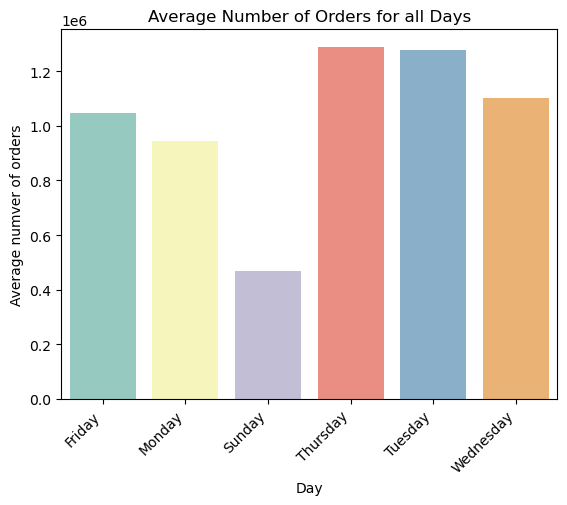

In [54]:
sns.barplot(data = orders_per_day, x = 'Day', y = 'Quantity', palette = 'Set3')
plt.title('Average Number of Orders for all Days')
plt.xlabel('Day')
plt.ylabel('Average numver of orders')
plt.xticks(rotation=45, ha="right")
plt.show()

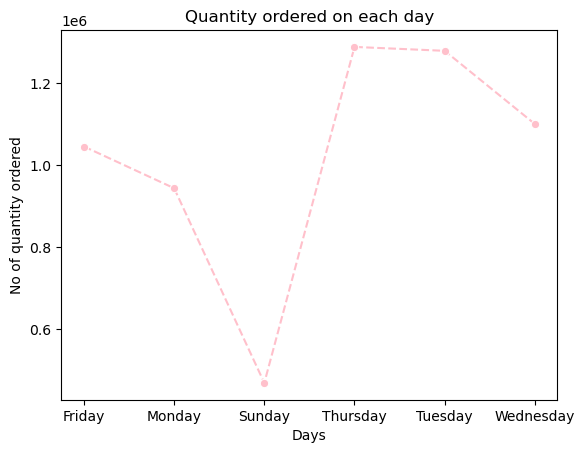

In [55]:
sns.lineplot(data = orders_per_day, x = 'Day', y = 'Quantity', marker = 'o', linestyle = '--', color = 'pink')
plt.xlabel('Days')
plt.ylabel('No of quantity ordered')
plt.title('Quantity ordered on each day')
plt.show()

* Here also we can observe that the average number of orders for weekdays is nearly equal.
* But on saturday there are no orders and on sunday the orders are half than the other days.

In [56]:
frequent_customers = data.groupby(['CustomerID', 'Amount'])['InvoiceNo'].nunique().reset_index()
frequent_customers.sort_values(by = 'InvoiceNo', ascending= False, inplace = True)

In [57]:
frequent_customers[:20]

,CustomerID,Amount,InvoiceNo
63994,14911.0,15.00,145
136775,17841.0,1.25,120
136836,17841.0,3.75,114
136784,17841.0,1.65,112
136816,17841.0,2.95,109
136807,17841.0,2.55,105
63951,14911.0,10.20,104
136768,17841.0,0.85,96
64014,14911.0,17.70,96
64027,14911.0,19.80,96


## Total sales per country

In [58]:
total_sales_per_country = data.groupby('Country')['Amount'].sum().reset_index()
total_sales_per_country.sort_values(by = 'Amount', ascending=False, inplace = True)
total_sales_per_country

,Country,Amount
36,United Kingdom,9813684.034
10,EIRE,303287.660
24,Netherlands,286231.140
14,Germany,235847.330
13,France,221933.630
0,Australia,139897.850
31,Spain,68361.090
33,Switzerland,57772.150
3,Belgium,41481.720
32,Sweden,40150.250


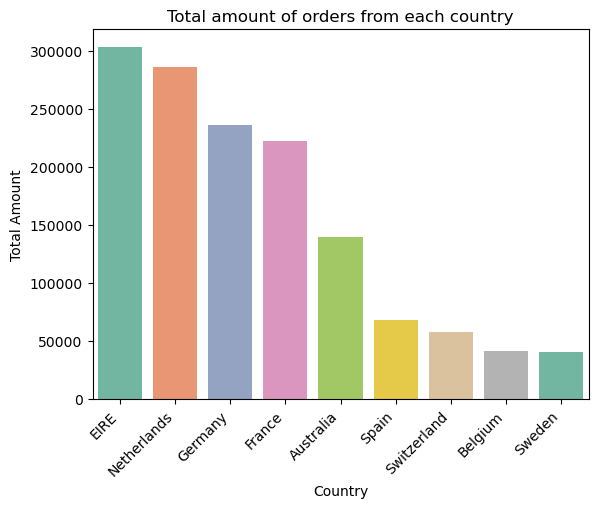

In [59]:
sns.barplot(data = total_sales_per_country[1:10], x = 'Country', y = 'Amount', palette = 'Set2')
plt.title('Total amount of orders from each country')
plt.xlabel('Country')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha="right")
plt.show()

In [60]:
df = data.groupby('CustomerID').agg({'InvoiceNo': 'nunique', 'Amount': 'sum'}).reset_index()
df.sort_values(by = 'InvoiceNo', ascending=False, inplace= True)
df

,CustomerID,InvoiceNo,Amount
1895,14911.0,248,154963.61
330,12748.0,224,37700.82
4042,17841.0,169,41170.63
1674,14606.0,128,12518.95
568,13089.0,118,60202.03
...,...,...,...
1141,13877.0,1,117.24
2997,16400.0,1,303.93
1142,13878.0,1,1271.57
1149,13886.0,1,243.56


In [61]:
conditions = [
    (df['InvoiceNo'] > 150),
    (df['InvoiceNo'] <= 150) & (df['InvoiceNo'] >= 50),
    (df['InvoiceNo'] < 50),
]

conditions_1 = [
    (df['Amount'] > 80000),
    (df['Amount'] <= 80000) & (df['Amount']>= 40000),
    (df['Amount'] < 40000)
]
values = ['Highly Frequent', 'Frequent', 'Occasional']
values_1 = ['High', 'Medium', 'Low']

# Create the new column based on the conditions and values
df['Frequency'] = np.select(conditions, values, default='Unknown')
df['PurchaseValue'] = np.select(conditions_1, values_1, default = 'Unknown')
df

,CustomerID,InvoiceNo,Amount,Frequency,PurchaseValue
1895,14911.0,248,154963.61,Highly Frequent,High
330,12748.0,224,37700.82,Highly Frequent,Low
4042,17841.0,169,41170.63,Highly Frequent,Medium
1674,14606.0,128,12518.95,Frequent,Low
568,13089.0,118,60202.03,Frequent,Medium
...,...,...,...,...,...
1141,13877.0,1,117.24,Occasional,Low
2997,16400.0,1,303.93,Occasional,Low
1142,13878.0,1,1271.57,Occasional,Low
1149,13886.0,1,243.56,Occasional,Low


In [62]:
df.sort_values(by = 'Amount', ascending= False)

,CustomerID,InvoiceNo,Amount,Frequency,PurchaseValue
3033,16446.0,3,336942.10,Occasional,High
1703,14646.0,77,280923.02,Frequent,High
4233,18102.0,62,262876.11,Frequent,High
3758,17450.0,55,201459.41,Frequent,High
1895,14911.0,248,154963.61,Highly Frequent,High
...,...,...,...,...,...
467,12943.0,1,3.75,Occasional,Low
3020,16428.0,1,2.95,Occasional,Low
1727,14679.0,1,2.55,Occasional,Low
3435,16995.0,1,1.25,Occasional,Low


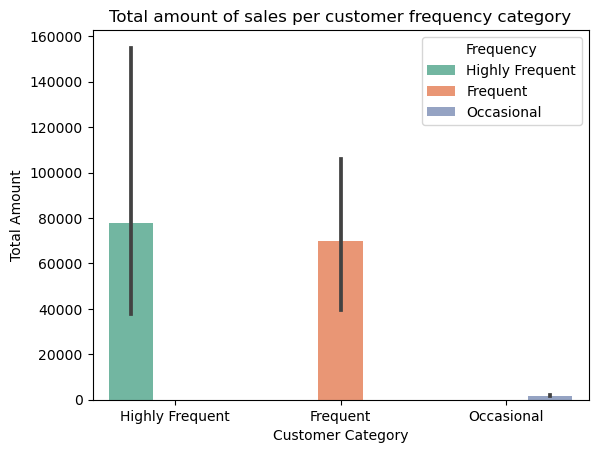

In [63]:
sns.barplot(data = df, x = 'Frequency', y = 'Amount', hue = 'Frequency', palette = 'Set2')
plt.title('Total amount of sales per customer frequency category')
plt.xlabel('Customer Category')
plt.ylabel('Total Amount')
plt.show()

We can see that the high frequent customers have high variablity in the sales compared to frequent and occasional customers. 
* This shows that the high frequent customers sales maybe high or maybe low.
* For frequent customers the variability of sales is not that high but is reasonable.
* Occasional customers, as they visit occasionally, the total amount of sales is very low and there is low variability.

In [64]:
df = df.drop(columns=['InvoiceNo', 'Amount'])

In [65]:
final_data = pd.merge(df, data, on='CustomerID', how='inner')
final_data

,CustomerID,Frequency,PurchaseValue,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Time,Month,Day,Year,Amount
0,14911.0,Highly Frequent,High,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,9.95,EIRE,14:05:00,December,Wednesday,2010,39.80
1,14911.0,Highly Frequent,High,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2.95,EIRE,14:05:00,December,Wednesday,2010,17.70
2,14911.0,Highly Frequent,High,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2.55,EIRE,14:05:00,December,Wednesday,2010,15.30
3,14911.0,Highly Frequent,High,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,0.85,EIRE,14:05:00,December,Wednesday,2010,42.50
4,14911.0,Highly Frequent,High,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2.25,EIRE,14:05:00,December,Wednesday,2010,13.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401597,13670.0,Occasional,Low,568204,22714,CARD BIRTHDAY COWBOY,12,0.42,United Kingdom,15:25:00,September,Sunday,2011,5.04
401598,13670.0,Occasional,Low,568204,22816,CARD MOTORBIKE SANTA,12,0.42,United Kingdom,15:25:00,September,Sunday,2011,5.04
401599,13670.0,Occasional,Low,568204,22027,TEA PARTY BIRTHDAY CARD,12,0.42,United Kingdom,15:25:00,September,Sunday,2011,5.04
401600,13670.0,Occasional,Low,568204,22028,PENNY FARTHING BIRTHDAY CARD,12,0.42,United Kingdom,15:25:00,September,Sunday,2011,5.04


Now the dataset is arranged according to the frequenc of the customer buying in the website.
So, this way we can keep in check the high priority customers.

In [66]:
product_sales = data.groupby(['Description', 'StockCode']).sum('Quantity').reset_index()
product_sales.sort_values(by = 'Quantity', ascending= False, inplace =True)
product_sales

,Description,StockCode,Quantity,UnitPrice,Year,Amount
2313,"PAPER CRAFT , LITTLE BIRDIE",23843,161990,4.16,4022,336939.20
1986,MEDIUM CERAMIC TOP STORAGE JAR,23166,152527,378.78,522860,159180.56
2600,POPCORN HOLDER,22197,57369,1520.31,2952020,51701.02
3860,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84077,56151,173.10,1087911,14067.93
1769,JUMBO BAG RED RETROSPOT,85099B,49490,5327.40,4335591,96143.83
...,...,...,...,...,...,...
3603,VANILLA SCENT CANDLE JEWELLED BOX,72802c,1,8.29,2011,8.29
290,BAROQUE BUTTERFLY EARRINGS RED,90025B,1,3.73,2011,3.73
357,BLACK CHUNKY BEAD BRACELET W STRAP,90184c,1,9.15,2011,9.15
1607,HAYNES CAMPER SHOULDER BAG,DCGS0004,1,16.63,2011,16.63


<Axes: xlabel='Quantity', ylabel='Description'>

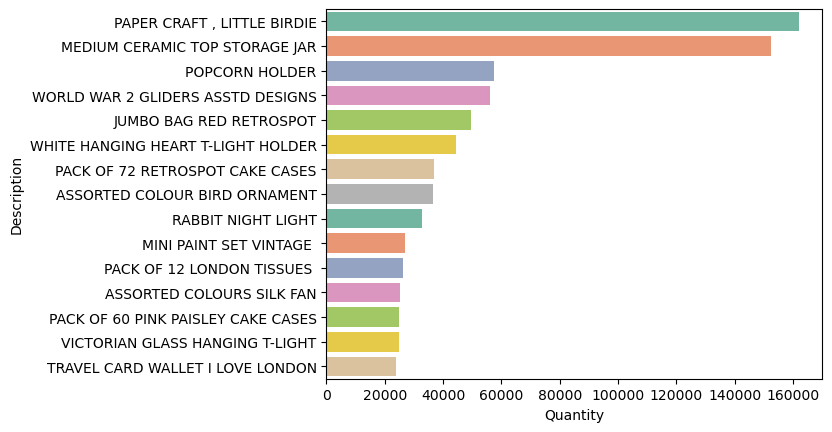

In [67]:
sns.barplot(data = product_sales[:15], x = 'Quantity', y = 'Description', palette = 'Set2')

The top 15 items ordered can be seen from the above plot and hence we can use these visualization to restore the stock according to the demand.